# 01 Weather Prediction

In [1]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define states and observations
states = ["Sunny", "Rainy"]
observations = ["Dry", "Wet"]
n_states = len(states)
n_observations = len(observations)

In [3]:
# Define model parameters
state_probability = np.array([0.6, 0.4])  # Initial probabilities
transition_probability = np.array([[0.7, 0.3], [0.3, 0.7]])  # Transition matrix
emission_probability = np.array([[0.9, 0.1], [0.2, 0.8]])  # Emission matrix

In [4]:
# Create HMM model
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = state_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability
model

CategoricalHMM(n_components=2)

In [5]:
# Define sequence of observations
observations_sequence = np.array([0, 1, 0, 1, 0, 0]).reshape(-1, 1)
observations_sequence

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [6]:
# Predict hidden states
hidden_states = model.predict(observations_sequence)
hidden_states

array([0, 1, 1, 1, 0, 0], dtype=int64)

In [7]:
# Decode observations using Viterbi algorithm
log_prob, viterbi_hidden_states = model.decode(observations_sequence, algorithm="viterbi")

In [8]:
log_prob

-6.360602626270058

In [9]:
viterbi_hidden_states

array([0, 1, 1, 1, 0, 0], dtype=int64)

In [10]:
print("Most likely hidden states:", hidden_states)

Most likely hidden states: [0 1 1 1 0 0]


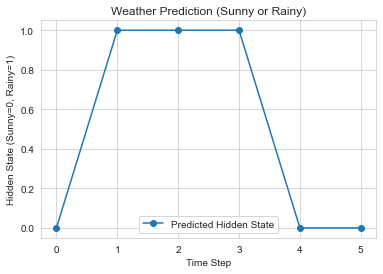

In [11]:
# Plot the results
sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Predicted Hidden State")
plt.xlabel("Time Step")
plt.ylabel("Hidden State (Sunny=0, Rainy=1)")
plt.title("Weather Prediction (Sunny or Rainy)")
plt.legend()
plt.show()

# 02 Speech Recognition

In [12]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Define the state space
states = ["Silence", "Word1", "Word2", "Word3"]
n_states = len(states)

# Define the observation space
observations = ["Loud", "Soft"]
n_observations = len(observations)

In [14]:
# Define the initial state distribution
start_probability = np.array([0.8, 0.1, 0.1, 0.0])

In [15]:
# Define the state transition probabilities
transition_probability = np.array([[0.7, 0.2, 0.1, 0.0],
                                    [0.0, 0.6, 0.4, 0.0],
                                    [0.0, 0.0, 0.6, 0.4],
                                    [0.0, 0.0, 0.0, 1.0]])

In [16]:
# Define the observation likelihoods
emission_probability = np.array([[0.7, 0.3],
                                  [0.4, 0.6],
                                  [0.6, 0.4],
                                  [0.3, 0.7]])

In [17]:
# Fit the model
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability
model

CategoricalHMM(n_components=4)

In [18]:
# Define the sequence of observations
observations_sequence = np.array([0, 1, 0, 0, 1, 1, 0, 1]).reshape(-1, 1)
observations_sequence

array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1]])

In [19]:
# Predict the most likely hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

Most likely hidden states: [0 1 2 2 3 3 3 3]


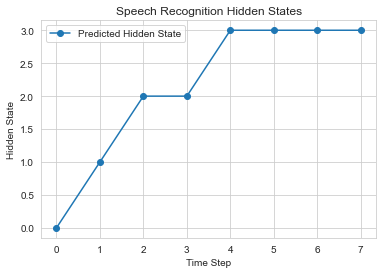

In [20]:
# Plot the results
sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Predicted Hidden State")
plt.xlabel("Time Step")
plt.ylabel("Hidden State")
plt.title("Speech Recognition Hidden States")
plt.legend()
plt.show()